# Business Understanding

This project aims to determine which planes would be best to look into first for indoor skydiving companies that plan to expand to offer real skydiving. We'll use an Aviation Accident Dataset to determine which planes would be the lowest risk for the company to start looking into for their expansion. 


# Data Understanding

"Notebook clearly describes the data, including:
- Describe the data sources and explain why the data are suitable for the project
- Present the size of the dataset and descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project"


The data source used in this project is a data set from the National Transportation Safety Board with specifics about US aviation accidents between 1962 through 2023. It is in the form of a CSV file and accessed through Kaggle.

Through data cleaning and visualizations, this project provides recommendations about which planes would be of lowest risk. The Aviation Accident data set is a good option to use for this project as it contains many factual details of specific accidents in past flight accidents. 

The Aviation Accident dataset contains 90348 records of individual aviation accidents. There are 31 columns that break down each accident into further details.



In [26]:
#import standard libraries/ load dataset into dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/refs/heads/master/data/Aviation_Data.csv')
data.head()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [27]:
data.shape

(90348, 31)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
data["Purpose.of.flight"].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

## Data Preparation

"Notebook shows how and why you prepared your data, including:
- Instructions or code needed to get and prepare the raw data for analysis
- Code comments and text to explain what your data preparation code does
- Valid justifications for why the steps you took are appropriate for the problem you are solving"

In [23]:
# Want to see some specifics first about what accidents are related to skydiving, start cleaning the data set, then make another dataframe -. skydiving

In [28]:
#cleaning up columns
data= data.drop(['Event.Id', 'FAR.Description','Publication.Date', 'Aircraft.Category', 'Amateur.Built', 'Registration.Number', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Air.carrier', 'Schedule', 'Investigation.Type', ], axis = 1)
data.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Country                 88663 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Make                    88826 non-null  object 
 6   Model                   88797 non-null  object 
 7   Number.of.Engines       82805 non-null  float64
 8   Engine.Type             81812 non-null  object 
 9   Purpose.of.flight       82697 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Total.Minor.Injuries    76956 non-null  float64
 13  Total.Uninjured         82977 non-null  float64
 14  Weather.Condition       84397 non-null

In [29]:
#formate date column
data['Event.Date'] = pd.to_datetime(data['Event.Date'])

In [30]:
#add column for year and month, so we can later see accidents by year/ by month
data['Year'] = data['Event.Date'].dt.year
data['Month'] = data['Event.Date'].dt.month_name()

In [68]:
data['Injury.Severity.Type'] = data['Injury.Severity'].str.split('(').str[0]

In [69]:
data['Injury.Severity.Type'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity.Type, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              88889 non-null  datetime64[ns]
 1   Location                88837 non-null  object        
 2   Country                 88663 non-null  object        
 3   Injury.Severity         87889 non-null  object        
 4   Aircraft.damage         85695 non-null  object        
 5   Make                    88826 non-null  object        
 6   Model                   88797 non-null  object        
 7   Number.of.Engines       82805 non-null  float64       
 8   Engine.Type             81812 non-null  object        
 9   Purpose.of.flight       82697 non-null  object        
 10  Total.Fatal.Injuries    77488 non-null  float64       
 11  Total.Serious.Injuries  76379 non-null  float64       
 12  Total.Minor.Injuries    76956 non-null  float6

In [31]:
data['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Nauru                 1
Belarus               1
Ivory Coast           1
Niger                 1
Liberia               1
Name: Country, Length: 219, dtype: int64

In [32]:
#to only look at accidents within the states, new US dataframe
data_us= data[data['Country'] == 'United States']

In [13]:
data_us.shape

(82248, 19)

In [21]:
data_us['Aircraft.damage'].value_counts()

Substantial    61675
Destroyed      16425
Minor           2119
Unknown           50
Name: Aircraft.damage, dtype: int64

In [22]:
data_us['Weather.Condition'].value_counts()

VMC    75317
IMC     5618
UNK      547
Unk      121
Name: Weather.Condition, dtype: int64

In [33]:
#skydiving specific dataframe
skydiving = data_us[data_us['Purpose.of.flight'] == 'Skydiving']
skydiving.head()

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month
2099,1982-07-25,"LOUISBURG, NC",United States,Fatal(4),Destroyed,Cessna,182A,1.0,Reciprocating,Skydiving,4.0,1.0,NaN,NaN,VMC,Takeoff,Probable Cause,1982.0,July
3066,1982-10-17,"TAFT, CA",United States,Fatal(14),Destroyed,Beech,C-45H,2.0,Reciprocating,Skydiving,14.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,1982.0,October
4285,1983-04-02,"MCKINNEY, TX",United States,Fatal(1),NaN,De Havilland,DHC-6,2.0,Turbo Prop,Skydiving,1.0,NaN,NaN,4.0,VMC,Standing,Probable Cause,1983.0,April
5960,1983-08-21,"SILVANA, WA",United States,Fatal(11),Destroyed,Lockheed,"LEARSTAR, L-18-56",2.0,Reciprocating,Skydiving,11.0,2.0,NaN,13.0,VMC,Other,Probable Cause,1983.0,August
10605,1984-12-30,"DUBLIN, VA",United States,Fatal(1),Destroyed,Cessna,182A,1.0,Reciprocating,Skydiving,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,1984.0,December


In [34]:
#reset the index
skydiving.reset_index(drop= True, inplace=True)

In [35]:
skydiving.head()


,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month
0,1982-07-25,"LOUISBURG, NC",United States,Fatal(4),Destroyed,Cessna,182A,1.0,Reciprocating,Skydiving,4.0,1.0,NaN,NaN,VMC,Takeoff,Probable Cause,1982.0,July
1,1982-10-17,"TAFT, CA",United States,Fatal(14),Destroyed,Beech,C-45H,2.0,Reciprocating,Skydiving,14.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,1982.0,October
2,1983-04-02,"MCKINNEY, TX",United States,Fatal(1),NaN,De Havilland,DHC-6,2.0,Turbo Prop,Skydiving,1.0,NaN,NaN,4.0,VMC,Standing,Probable Cause,1983.0,April
3,1983-08-21,"SILVANA, WA",United States,Fatal(11),Destroyed,Lockheed,"LEARSTAR, L-18-56",2.0,Reciprocating,Skydiving,11.0,2.0,NaN,13.0,VMC,Other,Probable Cause,1983.0,August
4,1984-12-30,"DUBLIN, VA",United States,Fatal(1),Destroyed,Cessna,182A,1.0,Reciprocating,Skydiving,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,1984.0,December


In [25]:
skydiving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              171 non-null    datetime64[ns]
 1   Location                171 non-null    object        
 2   Country                 171 non-null    object        
 3   Injury.Severity         171 non-null    object        
 4   Aircraft.damage         167 non-null    object        
 5   Make                    171 non-null    object        
 6   Model                   171 non-null    object        
 7   Number.of.Engines       171 non-null    float64       
 8   Engine.Type             165 non-null    object        
 9   Purpose.of.flight       171 non-null    object        
 10  Total.Fatal.Injuries    141 non-null    float64       
 11  Total.Serious.Injuries  121 non-null    float64       
 12  Total.Minor.Injuries    117 non-null    float64   

In [26]:
skydiving['Aircraft.damage'].value_counts()

Substantial    125
Destroyed       34
Minor            8
Name: Aircraft.damage, dtype: int64

In [27]:
skydiving['Total.Fatal.Injuries'].value_counts()

0.0     87
1.0     26
5.0      5
6.0      4
4.0      4
2.0      3
12.0     2
7.0      2
3.0      2
11.0     2
10.0     1
16.0     1
17.0     1
14.0     1
Name: Total.Fatal.Injuries, dtype: int64

In [28]:
skydiving['Total.Serious.Injuries'].value_counts()

0.0    78
1.0    27
2.0     7
4.0     4
5.0     2
3.0     1
7.0     1
6.0     1
Name: Total.Serious.Injuries, dtype: int64

In [29]:
skydiving['Total.Minor.Injuries'].value_counts()

0.0     91
1.0     19
2.0      5
6.0      1
13.0     1
Name: Total.Minor.Injuries, dtype: int64

In [30]:
skydiving['Total.Uninjured'].value_counts()

1.0     50
0.0     21
4.0     13
5.0     10
2.0      6
7.0      6
3.0      6
6.0      4
15.0     4
12.0     4
10.0     4
17.0     3
13.0     2
14.0     1
22.0     1
Name: Total.Uninjured, dtype: int64

In [34]:
skydiving['Make'].value_counts()

CESSNA                        72
Cessna                        54
Beech                         12
De Havilland                  10
BEECH                          6
DEHAVILLAND                    5
PACIFIC AEROSPACE CORP LTD     3
Lockheed                       2
Pilatus                        2
de Havilland                   1
C A S A                        1
Helio                          1
BOEING                         1
FIREFLY BALLOONS INC           1
Name: Make, dtype: int64

In [36]:
skydiving['Make'] = skydiving['Make'].str.title()

<ipython-input-36-7d80e706a174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skydiving['Make'] = skydiving['Make'].str.title()


In [37]:
skydiving['Make'].value_counts()

Cessna                        126
Beech                          18
De Havilland                   11
Dehavilland                     5
Pacific Aerospace Corp Ltd      3
Pilatus                         2
Lockheed                        2
Helio                           1
Firefly Balloons Inc            1
C A S A                         1
Boeing                          1
Name: Make, dtype: int64

In [38]:
skydiving['Make'] = skydiving['Make'].replace('Dehavilland', 'De Havilland')

<ipython-input-38-d251656d6c6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skydiving['Make'] = skydiving['Make'].replace('Dehavilland', 'De Havilland')


In [39]:
skydiving['Make'].value_counts()

Cessna                        126
Beech                          18
De Havilland                   16
Pacific Aerospace Corp Ltd      3
Pilatus                         2
Lockheed                        2
Helio                           1
Firefly Balloons Inc            1
C A S A                         1
Boeing                          1
Name: Make, dtype: int64

In [39]:
skydiving['Model'].value_counts()

182A                 29
182                  29
208                   9
208B                  6
182C                  6
                     ..
U206G                 1
LEARSTAR, L-18-56     1
DHC-6-6               1
A185F                 1
G18 - S               1
Name: Model, Length: 66, dtype: int64

In [40]:
#When exploring the skydiving accidents, we see that the Make: Cessna and the models 182 and 182A are the most common. We'll use this
#to look further into the full set of data.

In [40]:
skydiving['Injury.Severity'].value_counts()

Non-Fatal    114
Fatal(1)      17
Fatal         15
Fatal(6)       4
Fatal(5)       4
Fatal(4)       3
Fatal(2)       2
Fatal(7)       2
Fatal(12)      2
Fatal(10)      1
Fatal(16)      1
Fatal(17)      1
Serious        1
Fatal(3)       1
Minor          1
Fatal(11)      1
Fatal(14)      1
Name: Injury.Severity, dtype: int64

In [41]:
skydiving['Total.Fatal.Injuries'].value_counts()

0.0     87
1.0     26
5.0      5
6.0      4
4.0      4
2.0      3
12.0     2
7.0      2
3.0      2
11.0     2
10.0     1
16.0     1
17.0     1
14.0     1
Name: Total.Fatal.Injuries, dtype: int64

In [28]:
#Injury.Severity Column -Fatal() doesn't match the Total.Fatal.Injuries Column-> Total.Fatal.Injuries Column missing values

In [41]:
skydiving['Fatality'] = skydiving['Injury.Severity'].apply(lambda x: 'Non-Fatal' if 'non-fatal' in x.lower() else 'Fatal')
skydiving.head()

<ipython-input-41-02aa09b47540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skydiving['Fatality'] = skydiving['Injury.Severity'].apply(lambda x: 'Non-Fatal' if 'non-fatal' in x.lower() else 'Fatal')


,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month,Fatality
0,1982-07-25,"LOUISBURG, NC",United States,Fatal(4),Destroyed,Cessna,182A,1.0,Reciprocating,Skydiving,4.0,1.0,NaN,NaN,VMC,Takeoff,Probable Cause,1982.0,July,Fatal
1,1982-10-17,"TAFT, CA",United States,Fatal(14),Destroyed,Beech,C-45H,2.0,Reciprocating,Skydiving,14.0,NaN,NaN,NaN,VMC,Takeoff,Probable Cause,1982.0,October,Fatal
2,1983-04-02,"MCKINNEY, TX",United States,Fatal(1),NaN,De Havilland,DHC-6,2.0,Turbo Prop,Skydiving,1.0,NaN,NaN,4.0,VMC,Standing,Probable Cause,1983.0,April,Fatal
3,1983-08-21,"SILVANA, WA",United States,Fatal(11),Destroyed,Lockheed,"LEARSTAR, L-18-56",2.0,Reciprocating,Skydiving,11.0,2.0,NaN,13.0,VMC,Other,Probable Cause,1983.0,August,Fatal
4,1984-12-30,"DUBLIN, VA",United States,Fatal(1),Destroyed,Cessna,182A,1.0,Reciprocating,Skydiving,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,1984.0,December,Fatal


In [42]:
grouped4 = skydiving.groupby(['Make', 'Fatality']).size().reset_index(name='Count')

print(grouped4)

                          Make   Fatality  Count
0                        Beech      Fatal     12
1                        Beech  Non-Fatal      6
2                       Boeing  Non-Fatal      1
3                      C A S A      Fatal      1
4                       Cessna      Fatal     31
5                       Cessna  Non-Fatal     95
6                 De Havilland      Fatal      9
7                 De Havilland  Non-Fatal      7
8         Firefly Balloons Inc      Fatal      1
9                        Helio      Fatal      1
10                    Lockheed      Fatal      2
11  Pacific Aerospace Corp Ltd  Non-Fatal      3
12                     Pilatus  Non-Fatal      2


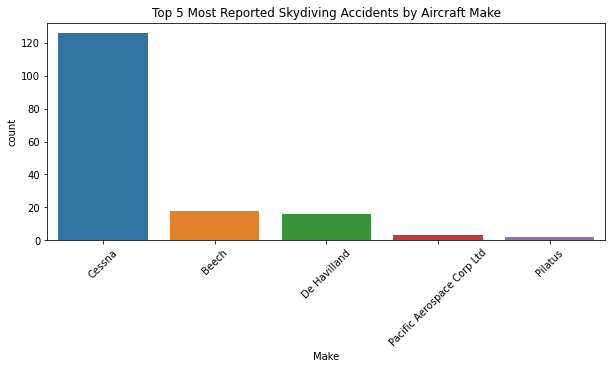

In [43]:
make_ordered = skydiving['Make'].value_counts(ascending=False).index[:5]

# Create a figure with a wider aspect ratio
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the width (10) as needed
sns.countplot(x='Make', data=skydiving, order= make_ordered)
plt.xticks(rotation=45)
ax.set_title("Top 5 Most Reported Skydiving Accidents by Aircraft Make")
plt.show()


In [48]:
# We will begin by looking at Cessna and Beech models in the full aviation accident dataset as they will be most relevant for skydiving.



In [46]:
data_us.head()


,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948.0,October
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1962.0,July
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,1974.0,August
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1977.0,June
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1979.0,August


In [60]:
data_us.isna().sum()

Event.Date                    0
Location                     11
Country                       0
Injury.Severity             108
Aircraft.damage            1979
Make                         21
Model                        38
Number.of.Engines          1875
Engine.Type                3023
Purpose.of.flight          2429
Total.Fatal.Injuries      10654
Total.Serious.Injuries    11375
Total.Minor.Injuries      10729
Total.Uninjured            5005
Weather.Condition           645
Broad.phase.of.flight     21090
Report.Status              2611
Year                          0
Month                         0
dtype: int64

In [67]:
#????????????????
data_us.dropna(subset=['Location'], inplace=True)
data_us.dropna(subset=['Injury.Severity'], inplace=True)
data_us['Aircraft.damage'].fillna('UKN', inplace=True)
data_us.dropna(subset=['Make'], inplace=True)
data_us.dropna(subset=['Model'], inplace=True)
data_us['Number.of.Engines'].fillna('UKN', inplace=True)
data_us['Engine.Type'].fillna('UKN', inplace=True)
data_us['Purpose.of.flight'].fillna('UKN', inplace=True)
data_us['Total.Fatal.Injuries'].fillna('UKN', inplace=True)
data_us['Total.Serious.Injuries'].fillna('UKN', inplace=True)
data_us['Total.Minor.Injuries'].fillna('UKN', inplace=True)
data_us['Total.Uninjured'].fillna('UKN', inplace=True)
data_us['Weather.Condition'].fillna(data_us['Weather.Condition'].mode()[0], inplace=True)
data_us['Broad.phase.of.flight'].fillna('UKN', inplace=True)
data_us['Report.Status'].fillna('n/a', inplace=True)

<ipython-input-67-3c1ff883849c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us.dropna(subset=['Location'], inplace=True)
<ipython-input-67-3c1ff883849c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us.dropna(subset=['Injury.Severity'], inplace=True)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-

In [64]:
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82084 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              82084 non-null  datetime64[ns]
 1   Location                82084 non-null  object        
 2   Country                 82084 non-null  object        
 3   Injury.Severity         82084 non-null  object        
 4   Aircraft.damage         82084 non-null  object        
 5   Make                    82084 non-null  object        
 6   Model                   82084 non-null  object        
 7   Number.of.Engines       82084 non-null  object        
 8   Engine.Type             82084 non-null  object        
 9   Purpose.of.flight       82084 non-null  object        
 10  Total.Fatal.Injuries    82084 non-null  object        
 11  Total.Serious.Injuries  82084 non-null  object        
 12  Total.Minor.Injuries    82084 non-null  object

In [52]:
data_us['Make'] = data_us['Make'].str.title()

<ipython-input-52-336e4bce6221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us['Make'] = data_us['Make'].str.title()


In [53]:
data_us['Make'] = data_us['Make'].replace('Dehavilland', 'De Havilland')

<ipython-input-53-d520367e060b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us['Make'] = data_us['Make'].replace('Dehavilland', 'De Havilland')


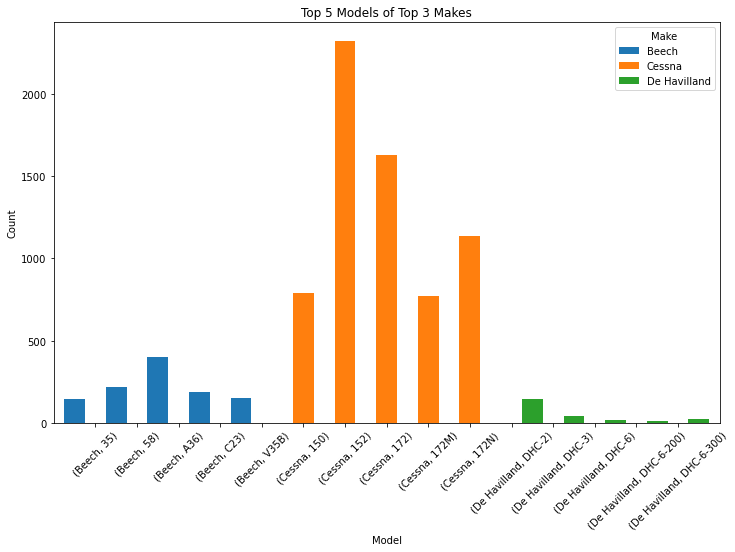

In [65]:
top_makes = skydiving['Make'].value_counts().nlargest(3).index

# Filter DataFrame for top 3 makes
df_filtered = data_us[data_us['Make'].isin(top_makes)]

# Get top 5 models for each make
top_models = df_filtered.groupby('Make')['Model'].value_counts().groupby(level=0).nlargest(5)

# Create a new DataFrame for plotting
plot_df = top_models.unstack(level=0).fillna(0)

# Plot the unstacked bar chart
plot_df.plot(kind='bar', figsize=(10, 8), width=1.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.title('Top 5 Models of Top 3 Makes')
plt.xlabel('Model')
plt.ylabel('Count')
plt.legend(title='Make')
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot the unstacked bar chart
sns.barplot(x='Category', y='Value1', data=df, ax=ax, label='Value1')
sns.barplot(x='Category', y='Value2', data=df, ax=ax, label='Value2')

# Add legend and labels
ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Values')
plt.show()

Text(0.5, 0, 'Make')

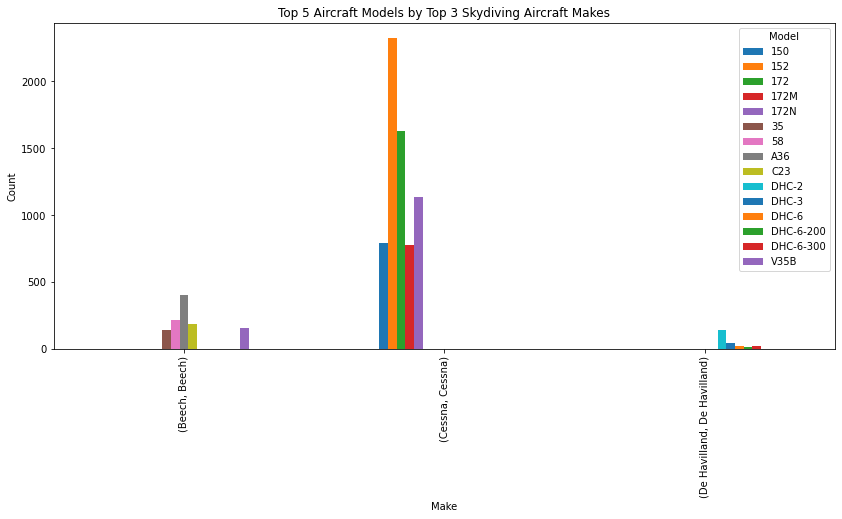

In [66]:
top_skydiving_makes = make_ordered[:3]

# Filter dataframe for top 5 makes
df_top_makes = data_us[data_us['Make'].isin(top_skydiving_makes)]

# Get top 5 models for each top make
top_models_by_make = df_top_makes.groupby('Make')['Model'].value_counts().groupby(level=0).nlargest(5)

ax = top_models_by_make.unstack().plot(kind='bar', figsize=(14, 6))

ax.set_title('Top 5 Aircraft Models by Top 3 Skydiving Aircraft Makes')
ax.set_ylabel('Count')
ax.set_xlabel('Make')

In [76]:
# find fatality count amongst single vs multi engine 
#also note that in skydiving data frame, Cessna's top models were the 182 and 182A, which is not featured in the above chart that encompasses the full us dataframe

# Exploratory Data Analysis

"Notebook promotes three recommendations for choosing films to produce:
 - Uses three or more findings from data analyses to support recommendations
 - Explains why the findings support the recommendations
 - Explains how the recommendations would help the stakeholder


"Notebook includes three relevant and polished visualizations of findings that:
 - Help the project stakeholder understand the value or success of the project
 - Have text and marks to aid reader interpretation, such as graph and axis titles, axis ticks and labels, or legend (varies by visualization type)
 - Use color, size, and/or location to appropriately facilitate comparisons
 - Are not cluttered, dense, or illegible
"

# Conclusions

## Limitations

The largest limitation of this data set is that we only have the data for accidents. We don't have the data for when flights occurred where everything went smoothly. This means we cannot say anything like: "99% of flights of a certain kind of plane has safe flights." This also makes it difficult to see the whole picture. We assume that certain Aircrafts appear more often because they are more common, not because they are inherently more dangerous.

## Recommendations

These planes are commonly used.
Of the commonly used, these have the least reported accidents.
Of all of the reported accidents with most commonly used planes, these are the main reason for the accident.

## Next Steps

Look into price for these planes.